In [10]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import optuna
import os
import pytorch_lightning as pl
import yaml

from Data.Drosophilla.FlyDataMod import FlyDataModule
from IPython.core.debugger import set_trace
from Models import BiLSTM as bi
from torch import nn as nn
from Utils import callbacks as cb
from Utils import evaluations as ev
from Utils import HyperParams as hp
from Utils import loggers as lg

np.random.seed(0)

In [11]:
def runBiLSTM_Exp(
    trial,
    label_type,
    label_val,
    lr,
    batch_size,
    num_layers,
    hidden_size,
    dropout,
    bias):
    logger = lg.DictLogger(trial.number,
                          root_dir)
    trainer = pl.Trainer(
        gpus=1,
        logger=logger,
        max_epochs=50,
        callbacks=[cb.getcb()],
        default_root_dir=root_dir)
    
    dm = FlyDataModule(cell_line="S2",
                     data_win_radius=5,
                     batch_size=batch_size,
                     label_type=label_type,
                     label_val=label_val)
    dm.setup()
    
    hparams = {'cell_line':"S2",
              "data_win_radius":5,
              "label_type":label_type,
              "batch_size":batch_size}
    
    model_bilstm = bi.BiLSTMModule(
                    input_size=29,
                    hidden_size=hidden_size,
                    num_layers=num_layers,
                    dropout=dropout,
                    bias=bias,
                    lr=lr,
                    hparams=hparams
                )
    model_bilstm.cuda()
    
    trainer.fit(model_bilstm, dm)
    score = logger.metrics[-1]['val weighted mse loss']
    if np.isnan(score):
        score = 99999999
    return score

def objective(trial):
    lr          = trial.suggest_categorical("lr", [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
    batch_size  = trial.suggest_categorical("batch_size", [1,4,16,64])
    num_layers  = trial.suggest_categorical("num_layers", [1,2,3,4,5,6])
    hidden_size = trial.suggest_categorical("hidden_size", [64])
    dropout     = trial.suggest_categorical("dropout", [0, 0.1, 0.2, 0.3])
    bias        = trial.suggest_categorical("bias", [True, False])
    print(lr, batch_size, num_layers, hidden_size, dropout, bias)
    return runBiLSTM_Exp(
        trial=trial,
        label_type=label_type,
        label_val=label_val,
        lr=lr,
        batch_size=batch_size,
        num_layers=num_layers,
        hidden_size=hidden_size,
        dropout=dropout,
        bias=bias)

In [12]:
label_type = "insulation"
label_val  = 10
root_dir   = "Experiments/Table_8_LSTM_Tunning_Insulation"
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)

In [13]:
label_type = "insulation"
label_val  = 10
root_dir   = "Experiments/Table_8_LSTM_Tunning_Insulation"
if not os.path.isdir(root_dir):
    os.mkdir(root_dir)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
hp.save_hyperparams(root_dir,
                   study.best_trial.number)

[I 2021-04-24 20:06:30,400] A new study created in memory with name: no-name-553b3277-76fc-402b-bf84-e3b4c7cca3fc


0.001 16 6 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:07:09,679] Trial 0 finished with value: 0.039294224232435226 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 0 with value: 0.039294224232435226.


0.001 16 1 64 0.2 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 15.5 K
------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:07:34,542] Trial 1 finished with value: 0.04112904146313667 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0.2, 'bias': False}. Best is trial 0 with value: 0.039294224232435226.


1e-05 16 6 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 30.0 K
------------------------------
30.0 K    Trainable params
0         Non-trainable params
30.0 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:10:08,468] Trial 2 finished with value: 0.0392930805683136 and parameters: {'lr': 1e-05, 'batch_size': 16, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 2 with value: 0.0392930805683136.


0.01 1 4 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:21:30,066] Trial 3 finished with value: 0.039314378052949905 and parameters: {'lr': 0.01, 'batch_size': 1, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 2 with value: 0.0392930805683136.


0.01 16 2 64 0.2 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 17.2 K
------------------------------
17.2 K    Trainable params
0         Non-trainable params
17.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:21:57,744] Trial 4 finished with value: 0.04157279431819916 and parameters: {'lr': 0.01, 'batch_size': 16, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.2, 'bias': False}. Best is trial 2 with value: 0.0392930805683136.


0.001 16 4 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:22:56,956] Trial 5 finished with value: 0.03481242060661316 and parameters: {'lr': 0.001, 'batch_size': 16, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 5 with value: 0.03481242060661316.


0.01 4 1 64 0 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 15.5 K
------------------------------
15.5 K    Trainable params
0         Non-trainable params
15.5 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:24:01,666] Trial 6 finished with value: 0.06482826918363571 and parameters: {'lr': 0.01, 'batch_size': 4, 'num_layers': 1, 'hidden_size': 64, 'dropout': 0, 'bias': False}. Best is trial 5 with value: 0.03481242060661316.


0.0001 4 3 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:27:07,317] Trial 7 finished with value: 0.03479873761534691 and parameters: {'lr': 0.0001, 'batch_size': 4, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 7 with value: 0.03479873761534691.


0.01 16 6 64 0.2 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 23.8 K
------------------------------
23.8 K    Trainable params
0         Non-trainable params
23.8 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:27:51,501] Trial 8 finished with value: 0.04987363889813423 and parameters: {'lr': 0.01, 'batch_size': 16, 'num_layers': 6, 'hidden_size': 64, 'dropout': 0.2, 'bias': False}. Best is trial 7 with value: 0.03479873761534691.


0.001 1 2 64 0.1 False


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 17.2 K
------------------------------
17.2 K    Trainable params
0         Non-trainable params
17.2 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:31:42,070] Trial 9 finished with value: 0.06041458994150162 and parameters: {'lr': 0.001, 'batch_size': 1, 'num_layers': 2, 'hidden_size': 64, 'dropout': 0.1, 'bias': False}. Best is trial 7 with value: 0.03479873761534691.


0.0001 64 3 64 0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:32:12,125] Trial 10 finished with value: 0.03547932580113411 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0, 'bias': True}. Best is trial 7 with value: 0.03479873761534691.


0.0001 4 5 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 27.3 K
------------------------------
27.3 K    Trainable params
0         Non-trainable params
27.3 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:35:23,401] Trial 11 finished with value: 0.03869814798235893 and parameters: {'lr': 0.0001, 'batch_size': 4, 'num_layers': 5, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 7 with value: 0.03479873761534691.


0.1 4 3 64 0.3 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:36:45,368] Trial 12 finished with value: 0.03931340575218201 and parameters: {'lr': 0.1, 'batch_size': 4, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.3, 'bias': True}. Best is trial 7 with value: 0.03479873761534691.


0.0001 64 4 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:38:29,807] Trial 13 finished with value: 0.03304241970181465 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


0.0001 64 3 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 21.9 K
------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:39:24,436] Trial 14 finished with value: 0.03472917899489403 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 3, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


0.0001 64 4 64 0.2 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:40:17,836] Trial 15 finished with value: 0.03442952409386635 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.2, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


0.0001 64 4 64 0 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:41:42,118] Trial 16 finished with value: 0.034983664751052856 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


0.0001 64 4 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:43:25,756] Trial 17 finished with value: 0.03362687677145004 and parameters: {'lr': 0.0001, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


0.1 64 4 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 24.6 K
------------------------------
24.6 K    Trainable params
0         Non-trainable params
24.6 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:44:06,268] Trial 18 finished with value: 0.03888576477766037 and parameters: {'lr': 0.1, 'batch_size': 64, 'num_layers': 4, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


1e-05 64 5 64 0.1 True


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Everything set
logging them hyperparams:Experiments/Table_8_LSTM_Tunning_Insulation



  | Name | Type | Params
------------------------------
0 | lstm | LSTM | 27.3 K
------------------------------
27.3 K    Trainable params
0         Non-trainable params
27.3 K    Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

[I 2021-04-24 20:46:40,987] Trial 19 finished with value: 0.03930588811635971 and parameters: {'lr': 1e-05, 'batch_size': 64, 'num_layers': 5, 'hidden_size': 64, 'dropout': 0.1, 'bias': True}. Best is trial 13 with value: 0.03304241970181465.


Everything set


/home/heracles/miniconda3/envs/honeydew/lib/python3.8/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


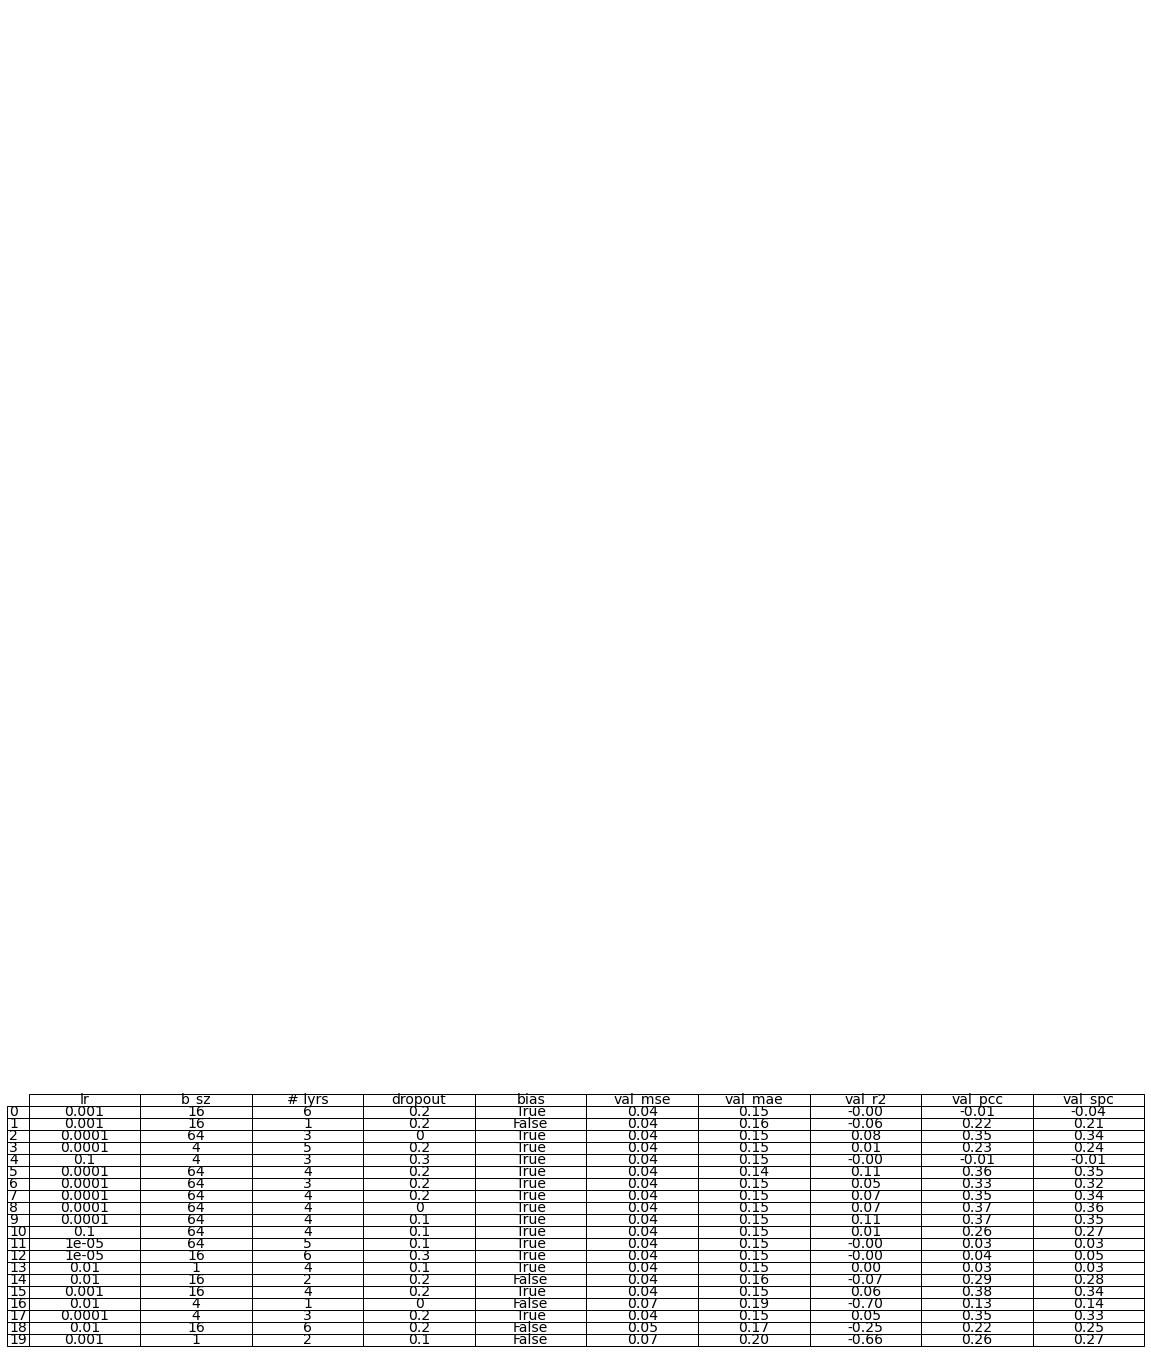

In [14]:
#display table 8
label_type = "insulation"
label_val  = 10
dm         = FlyDataModule(cell_line="S2",
                          data_win_radius=5,
                          batch_size=1,
                          label_type=label_type,
                          label_val=label_val)
dm.setup()
vals = []

exps = sorted(glob.glob(root_dir+"/optuna/*"))
for e, exp in enumerate(exps):
    layer_weights = glob.glob(exp+"/checkpoints/*")[0]
    hparams       = yaml.full_load(open(glob.glob(exp+"/hparams.yaml")[0], 'r'))
    model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
    row           = []
    row.append(hparams['lr'])
    row.append(hparams['hparams']['batch_size'])
    row.append(hparams['num_layers'])
    row.append(hparams['dropout'])
    row.append(hparams['bias'])
    mm            = ev.getModelMetrics(model, dm, 'val').values()
    fmm           = list(map(lambda x: "{:.2f}".format(x), mm ))
    row.extend(fmm)
    vals.append(row)
cols = ['lr','b_sz', '# lyrs', 'dropout','bias','val_mse','val_mae','val_r2','val_pcc','val_spc']
fig, ax = plt.subplots(1, figsize=(20,20))
table   = ax.table(vals,
                  cellLoc="center",
                  colLabels=cols,
                  rowLabels=list(range(0, len(exps))))
table.set_fontsize(14)
ax.axis('off')
plt.show()

Everything set
Experiments/Table_8_LSTM_Tunning_Insulation/optuna/version_6/checkpoints/epoch=4-step=4949.ckpt


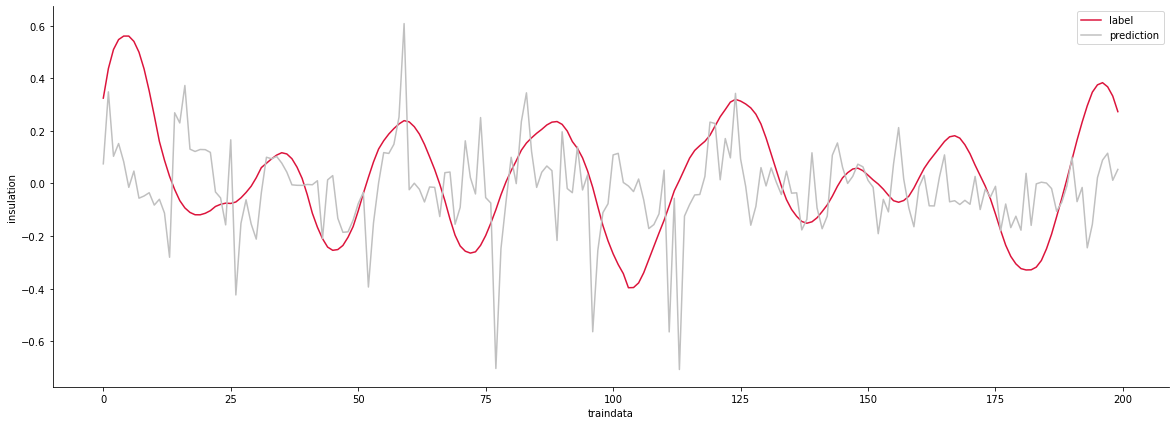

In [15]:
dm = FlyDataModule(cell_line="S2",
                  data_win_radius=5,
                  batch_size=1,
                  label_type="insulation",
                  label_val=10)
dm.setup()
layer_weights = glob.glob("Experiments/Table_8_LSTM_Tunning_Insulation/optuna/version_6/checkpoints/*")[0]
print(layer_weights)
model         = bi.BiLSTMModule.load_from_checkpoint(layer_weights).to("cuda:0")
ev.createPlot(model, dm, "train", "idk")

In [17]:
#to csv
import pandas as pd
ar_val   = np.array(vals)
ar_col   = np.expand_dims(np.array(cols),0)
csv_data = np.vstack((ar_col, ar_val))
pd.DataFrame(csv_data).to_csv("Experiments/Table_8_LSTM_Tunning_Insulation/Sup_8_Results.csv")